In [1]:
import os
import sys

sys.path.append(os.path.abspath("../common"))  # add path to common functions
from evaluate import evaluate_predictions
from preprocess import getdfs, get_char_columns
from preprocess import one_hot_encode
from models import predict_logistic_regression
from models import grid_search_
from models import predict_xgboost

In [2]:
train_df, test_df = getdfs("emoticon")
y_train = train_df["label"]
y_test = test_df["label"]

In [3]:
def find_common_characters(strings):
    # Convert the first string to a set of characters
    common_chars = set(strings[0])

    # Intersect with characters from all other strings
    for string in strings[1:]:
        common_chars &= set(string)
    
    return common_chars

def remove_common_characters(strings, common_chars):
    new_strings = []
    
    for string in strings:
        # Remove all common characters from the string
        new_string = ''.join(char for char in string if char not in common_chars)
        new_strings.append(new_string)

    return new_strings


In [4]:
strings = train_df['input_emoticon'].values
common_chars = find_common_characters(strings)

print("Common characters:", common_chars)

strings_after_removal = remove_common_characters(strings)
print("Strings after removal of common characters:", strings_after_removal)

Common characters: {'🛐', '😣', '🙯', '🚼', '😑', '🙼', '😛'}
Strings after removal of common characters: ['😻🙠😒', '😪🚅😹', '🚡🙲🛑', '🙐🙪🛆', '🚟🙋😹', '🚧🚜🙕', '🚥😬🚄', '🚡🚔🛓', '🛜😚🚠', '🙷😍😿', '🙚😍😸', '😯😻😹', '🙒🚙😬', '😿🚴😴', '🚂😦🙨', '🛝😉🙒', '😵🚃🚜', '🛆😘😊', '🚟😌😿', '🙧😉🚍', '🛓🚥😢', '🚵😊😩', '😬😠🛡', '🚜😰🚏', '🚗🙸🚌', '😓🚲😆', '🛌😺🙍', '😳🚦🙍', '🚏😏🙏', '😆😰🚯', '🙊😳😻', '😤🙍🙀', '😻🛔🚷', '🛈🛋\U0001f6db', '🚊🙸🛀', '🚒🙟😓', '😧🚰🙬', '🚳🛏😓', '🛍😨🛆', '🙬😗🙐', '🙈😱🙒', '🚄🚆🛖', '\U0001f6d8🙔🙏', '🚱🙊🛖', '🚮🛀🛀', '🙁🙽🛖', '🚵🚾🚣', '🚣🙇🚰', '😎🙏🚃', '🚿🚎🚯', '🙄🛎😁', '🙚😻🙅', '🚕🚯😓', '🙊😎😸', '😘🙍🙬', '😧🚰🙫', '🙷🙀😮', '🙳🙩🙟', '🚁🙦🛆', '🚴😊🙏', '😼😆🛄', '🛡🙳🙒', '😋😖🙕', '🙽😞🙩', '🚊🙐\U0001f6db', '🙙🚡🚄', '😿🙲🛇', '🚜🙤😶', '🛉🙨😒', '😯😚🚣', '🙾🚍🙅', '🚾🚀😓', '🚅\U0001f6db🙟', '😿😲🙏', '🚓🛌🙅', '🚍🚓😹', '😬🙶🛍', '🚦🛒\U0001f6db', '🚑😚🙩', '🚂🙎😊', '😧😚🛂', '🙫🚭🛍', '😚🙷😿', '😍🙈🚷', '🚀😊🛖', '😉😖😁', '😆🙑😋', '🛍😤🚾', '🙙😶🙩', '🛔🚄🛏', '🚚🛌🙩', '😚🛉🚿', '😳🙕😩', '🚍🚛😪', '🙄🙱🛓', '🙑🙨😕', '🛄🙗🚇', '😺🚿🙅', '😼🚰🛆', '😸🚧🛅', '🚑😶🚣', '🚽🛎\U0001f6db', '🙾🚏😕', '🛄🚩🚁', '😠😦😅', '🛈🙏🛓', '🚣🙜🛡', '🙹😦🛓', '🚶🚦😴', '🛌🚗😆', '😚😤😴', '😏🙬😋', '🙘🚇🚷', '🙒😷🛟', '😰😉🙕', '😾🛌😥', '🙳\U0001f6d8🚰', '😔🛜🛖', '🛎😊😻', '🙍🚲😸

In [5]:
# Create one-hot encoding of the dataset

train_df['input_emoticon'] = strings_after_removal
test_df['input_emoticon'] = remove_common_characters(test_df['input_emoticon'].values, common_chars)


In [6]:
train_df = get_char_columns(train_df)
test_df = get_char_columns(test_df)

In [7]:
x_train, x_valid, y_train, y_valid = one_hot_encode(train_df, test_df)

(7080, 501) (489, 501)


In [8]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions

Number of parameters in the MLP model:  8049
==========MLP==========
              precision    recall  f1-score   support

     Class 0       0.98      0.96      0.97       252
     Class 1       0.95      0.97      0.96       237

    accuracy                           0.97       489
   macro avg       0.97      0.97      0.97       489
weighted avg       0.97      0.97      0.97       489

Accuracy is 0.9652351738241309
==========MLP==========


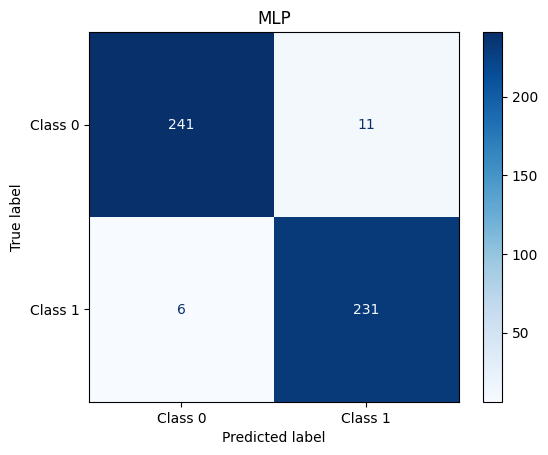

In [13]:
y_pred_mlp = predict_mlp(x_train, y_train, x_valid, hidden_layer_sizes=(16,), max_iter=1000)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP')

==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.92      0.91      0.92       252
     Class 1       0.91      0.92      0.91       237

    accuracy                           0.92       489
   macro avg       0.92      0.92      0.92       489
weighted avg       0.92      0.92      0.92       489

Accuracy is 0.9161554192229039
==========Random Forest==========


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==========XGBoost==========
              precision    recall  f1-score   support

     Class 0       0.90      0.95      0.93       252
     Class 1       0.95      0.89      0.92       237

    accuracy                           0.92       489
   macro avg       0.92      0.92      0.92       489
weighted avg       0.92      0.92      0.92       489

Accuracy is 0.9222903885480572
==========XGBoost==========
==========Logistic Regression==========
              precision    recall  f1-score   support

     Class 0       0.96      0.94      0.95       252
     Class 1       0.94      0.96      0.95       237

    accuracy                           0.95       489
   macro avg       0.95      0.95      0.95       489
weighted avg       0.95      0.95      0.95       489

Accuracy is 0.9488752556237219
==========Logistic Regression==========
Number of parameters in the MLP model:  36353
==========MLP==========
              precision    recall  f1-score   support

     Class 0       0.96

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


==========SVC==========
              precision    recall  f1-score   support

     Class 0       0.93      0.93      0.93       252
     Class 1       0.93      0.92      0.92       237

    accuracy                           0.93       489
   macro avg       0.93      0.93      0.93       489
weighted avg       0.93      0.93      0.93       489

Accuracy is 0.9263803680981595
==========SVC==========


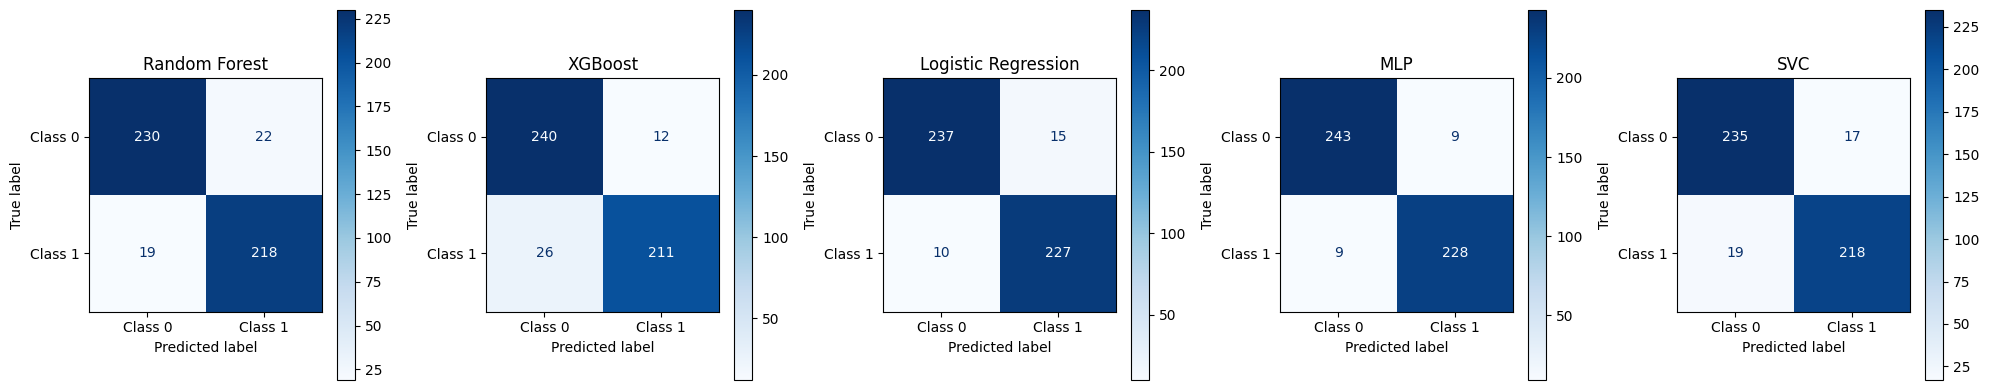

In [9]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])

y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])

y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC', ax = axes[4])

plt.tight_layout()
plt.show()

In [10]:
def count_parameters_sklearn_mlp(model):
    total_params = 0
    # Summing number of parameters in each layer (weights + biases)
    for coef in model.coefs_:
        total_params += np.prod(coef.shape)  # Number of weights
    for intercept in model.intercepts_:
        total_params += intercept.shape[0]  # Number of biases
    return total_params